> # Welcome to the Investigate a Dataset project! 

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, I will be going through the data analysis process using popular python modules such as NumPy arrays, Pandas Series and Matplotlib to derive useful insight from the TMDb movie dataset. The TMDb movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb). The information contained in the dataset includes movie's genres, cast,  revenue, popularity, budget, original_title, homepage, production companies, release date, vote count and so on

### Question(s) for Analysis
In order to explore the data deeply, answers will be provided to questions such as;

1)Are popular movies associated with high revenue?

2)How has the number of movies released per year changed over time? In which year was the highest number of movie released?


3)What kinds of properties are associated with movies that have high revenues?

4) what are the highest rated movies in each year




In [1]:
# Importing neccessary and useful packages for the analysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In this section, the data will loaded, and checked for cleanliness.  The data will also be trimmed and cleaned as require for the analysis.


### What does the data look like?

In [3]:
# First, the dataset was loaded and then we have a look at the 
#first five rows of the data to have an idea of what the data looks like

import pandas as pd
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### How big is the dataset ?

In [4]:
# Here we check the shape of the data to know the number of rows and columns contained in the data set
df_movies.shape

(10866, 21)

 From the output above the data contains 10866 rows denoting 10866 observations(movies) and 21 columns which denotes the number of attributes associated with each observation

### What attributes are available for each observation?

In [5]:
#Here we print out the columns to have an overview of all the columns/features present in the dataset
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The above output displays  the names of all the columns present in the dataset 

### Does the data contain any missing values? And what is the data type of each columns?
Identifying the category of each variable in the dataset forms a very important part of a data analysis project. It helps to process each variable with the right pre-processing strategy that 
would work for it or determine the type of statistical analysis that should be applied for the best 
results. 

In [6]:
# The data info was checked to identify the data type of each columns and also to identify columns with missing values
df_movies.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The above output indicated that the cast, homepage, tageline, key words,overview, genres and production company contains some missing values.

The dataset contains 21 variables out of which 10 are numerical(6 integers, 4 float) and 11 are objects. 
Each variable alongside the category of datatype to which they belong are shown above 

Looking closely at the data type of each columns, it could be seen that the release year was inputed as an object rather than a datatime, therefore there is a need for the column transformation to a datetime type

In [7]:
#Check for number of unique values in each column
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

The output above indicated that the data covered 56 different years of movie production, 247 different runtimes for all the movies featured and so on

### Does the data contain duplicates?

In [8]:
#To confirm if  there are any repeated observations in the dataset,
#the dataset was checked for duplicates and the total number of duplicates were outputed
sum(df_movies.duplicated())

1

The dataset contains one duplicated value which will have to be dropped to allow for consistency and uniques in the data points

#### Summary Statistics

In [9]:
#getting the summary statistics of the numerical variables in the dataset
df_movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


The output of the summary statistic of the dataset as shown above indicated that;

> * The year of production featured in the dataset ranges from year 1960 to year 2015

> * The runtime for movies ranges from minimum of Zero to Maximum of 900 with an average runtime of 102

> * The budget and the revenue ranges fro  zero to 4.250000e+08 and 2.781506e+09 respectively

Some of the problem identified  here is that a movie cannot have runtime of zero. Also, it is impossible for a movie to have zero budget  and zero revenue except if they were not produced at all. These errors could be a data entry problem or probably the values were not available. These issues will be addressed in the data cleaning section.


### Data Cleaning
To ensure that the data is in good condition for analysis, some cleaning will be perfomed on the data
 

Since the id and imbd_id are just movie identifiers, they will not be useful in any part of the analysis, hence this columns will be dropped. The  movie homepage as well also contains lot of missing values and does not seem to contain any useful information as well. It will also be dropped. The overview column does not seems to contain information that will be useful in our analysis as well .

In [10]:
#dropping columns that are not useful
df_movies.drop(columns=['id','imdb_id','homepage','overview'], axis=1, inplace=True)

In [11]:
#droppind duplicated rows
df_movies.drop_duplicates(inplace= True)

In [12]:
#checking the shape of the data after the above actions
df_movies.shape

(10865, 17)

In [13]:
# Getting an overview of the current state of the data
#view first five rows
df_movies.head(5)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#Converting release_date to datetime
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [15]:
#Display the columns with null values
df_movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From the output we can see that the 'cast', 'director','tagline', 'keywords','genres', 'production_companies' are the columns that contain null values. Dropping this columns will greatly impact the number on datapoint available for the analysis. Since these columns does not directly impact any of our research question, the null values will be replaced by the string 'Not available'

In [16]:
# Filling missing values with string 'Not Available'
df_movies.fillna('Not Available', inplace=True)

In [17]:
#Checking for null values
df_movies.isnull().sum()


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### To address the issue of zero value in the runtime, budget, budget_adj and revenue,  revenue_adj columns, we first check the columns containing zero values

In [18]:
# Count number of zeros in all columns of Dataframe
for column_name in df_movies.columns:
    column = df_movies[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  popularity  is :  0
Count of zeros in column  budget  is :  5696
Count of zeros in column  revenue  is :  6016
Count of zeros in column  original_title  is :  0
Count of zeros in column  cast  is :  0
Count of zeros in column  director  is :  0
Count of zeros in column  tagline  is :  0
Count of zeros in column  keywords  is :  0
Count of zeros in column  runtime  is :  31
Count of zeros in column  genres  is :  0
Count of zeros in column  production_companies  is :  0
Count of zeros in column  release_date  is :  0
Count of zeros in column  vote_count  is :  0
Count of zeros in column  vote_average  is :  0
Count of zeros in column  release_year  is :  0
Count of zeros in column  budget_adj  is :  5696
Count of zeros in column  revenue_adj  is :  6016


It is obvious from the above output that the  runtime, budget, budget_adj, revenue, and  revenue_adj columns are the ones containing zeros, therefore the rows with zero values will be dropped as they are not useful in the analysis

In [19]:
# Replace all values of 0 with NAN
df_movies= df_movies.replace(0, np.nan)

In [20]:
# Droping the null values
df_movies = df_movies.dropna()

## Visualizing the data after cleaning

In [21]:
df_movies.head(5)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
#checking the last 5 rows
df_movies.tail(5)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10822,0.670274,7500000.0,33736689.0,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,You are cordially invited to George and Martha...,alcohol|adultery|professor|married couple|son,131.0,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000.0,13000000.0,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,It tears you apart with suspense!,cold war|east germany,128.0,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000.0,6000000.0,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,It's the Big One with the Big Two,sheriff|ranch|liquor|settler|revolver,120.0,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000.0,20000000.0,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,This is the heroic story of the men on the U.S...,missionary|china|us navy|chinese|battle,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10848,0.207257,5115000.0,12000000.0,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,submarine|coma|claustrophobia|wound|laser,100.0,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07


In [23]:
#Checking the number of rows and columns left
df_movies.shape

(3854, 17)

After removing the rows with zero runtime, budgets and revenues, we are left with 3854 row and 17 columns

In [24]:
#Checking for missing values after cleaning
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3854 non-null   float64       
 1   budget                3854 non-null   float64       
 2   revenue               3854 non-null   float64       
 3   original_title        3854 non-null   object        
 4   cast                  3854 non-null   object        
 5   director              3854 non-null   object        
 6   tagline               3854 non-null   object        
 7   keywords              3854 non-null   object        
 8   runtime               3854 non-null   float64       
 9   genres                3854 non-null   object        
 10  production_companies  3854 non-null   object        
 11  release_date          3854 non-null   datetime64[ns]
 12  vote_count            3854 non-null   int64         
 13  vote_average     

The output showed that there are no missing data in the data

In [25]:
#getting the summary statistics of the numerical variables in the dataset
df_movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,3854.0,1.191554e+00,1.475162e+00,0.001117,4.623675e-01,7.975105e-01,1.368324e+00,3.298576e+01
budget,3854.0,3.720370e+07,4.220822e+07,1.000000,1.000000e+07,2.400000e+07,5.000000e+07,4.250000e+08
revenue,3854.0,1.076866e+08,1.765393e+08,2.000000,1.360003e+07,4.480000e+07,1.242125e+08,2.781506e+09
runtime,3854.0,1.092203e+02,1.992282e+01,15.000000,9.500000e+01,1.060000e+02,1.190000e+02,3.380000e+02
vote_count,3854.0,5.277203e+02,8.799568e+02,10.000000,7.100000e+01,2.040000e+02,5.800000e+02,9.767000e+03
vote_average,3854.0,6.168163e+00,7.949202e-01,2.200000,5.700000e+00,6.200000e+00,6.700000e+00,8.400000e+00
release_year,3854.0,2.001261e+03,1.128257e+01,1960.000000,1.995000e+03,2.004000e+03,2.010000e+03,2.015000e+03
budget_adj,3854.0,4.423999e+07,4.480925e+07,0.969398,1.309053e+07,3.001611e+07,6.061307e+07,4.250000e+08
revenue_adj,3854.0,1.370647e+08,2.161114e+08,2.370705,1.835735e+07,6.173068e+07,1.632577e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis





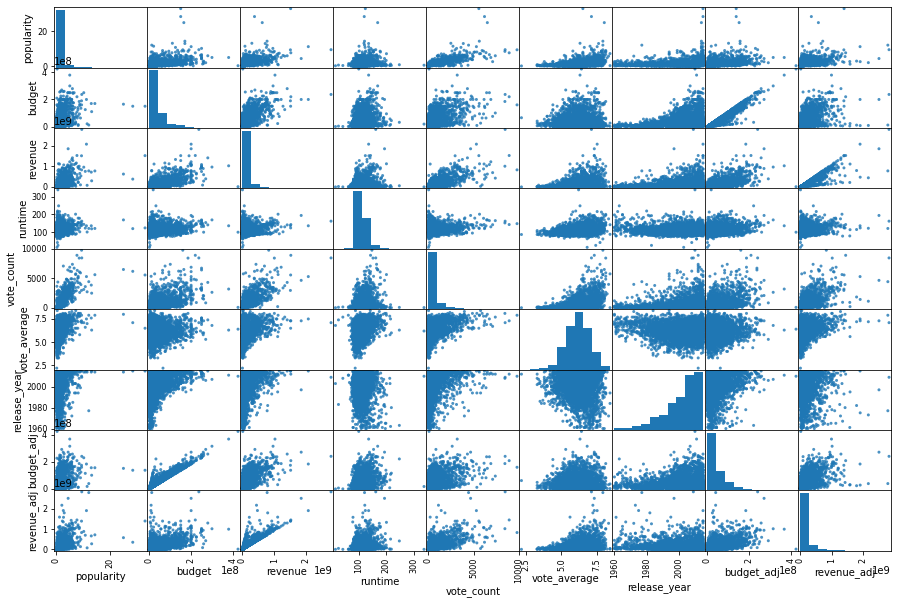

In [26]:
#Visualize the data frate with a sctter plot
pd.plotting.scatter_matrix(df_movies,figsize=(15,10), alpha=0.8);


The graph in the output above displayed the distrubution of each of the numeric variable and the correlation between them.
From the graph it can be seeen that popularity of a movie and its vote counts has a positive correlation, the budget and the revenue also displayed a positive correlation as well as the revenue and the vote count. 

The graph also showed that most of the dataset are skewed which could be due to the presence of outliers while only the vote average seems to be normally distributed.

In [27]:
# further investigate correlation between the numeric columns
df_movies.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.446987,0.615535,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959
budget,0.446987,1.000000,0.688556,0.260977,0.556937,0.024169,0.268040,0.958520,0.533498
revenue,0.615535,0.688556,1.000000,0.250298,0.754567,0.227123,0.139140,0.657567,0.900882
runtime,0.215092,0.260977,0.250298,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505
vote_count,0.780096,0.556937,0.754567,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688
vote_average,0.317866,0.024169,0.227123,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844
release_year,0.173278,0.268040,0.139140,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147
budget_adj,0.399356,0.958520,0.657567,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451
revenue_adj,0.546959,0.533498,0.900882,0.280505,0.654688,0.266844,-0.103147,0.570451,1.000000


From the output, it can be duduced that the movie release year does not neccessary have effect on the popularity,runtime,budget and revenue of a movie.

The revenue of a movie is affected by its popularity,budgets, and vote count with a positive correlation value greater than 0.5

### Research Question 1 (Are popular movies associated with high  revenues?)
To answer this question, we will check the ralationship between the popularity of a movie and its revenue adjusted

Text(0, 0.5, 'popularity')

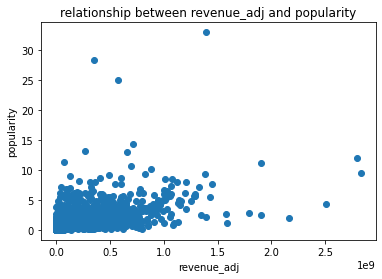

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.scatter(x= 'revenue_adj', y='popularity', data= df_movies)
plt.title('relationship between revenue_adj and popularity')
plt.xlabel('revenue_adj')
plt.ylabel('popularity')

The graph in the output above showed that there is a positive correlation between the popularity of a movie and its revenue. which indicated that the higher the popularity of a movie the more the revenue it will tend generate.

## Research Question 2  
### What is the highest number of movie produced in each year
### In which year was the highest number of movie released?
The reason for these question is to understand the trend in number of movies produced as the years goes by. To check if the number of movies produced per year has been increasing or decreasing.

Text(0, 0.5, 'movie count')

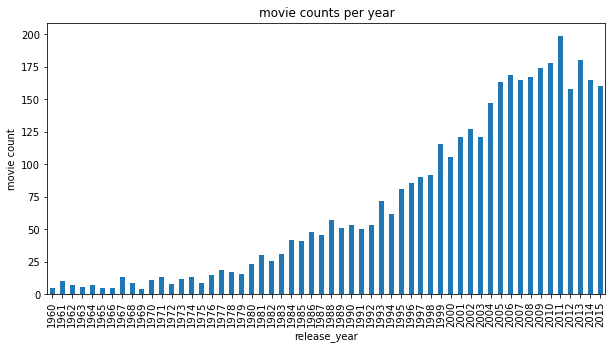

In [29]:

# Here we want to get the count of movies produce in each year
Count_Per_year=df_movies.groupby('release_year')['release_year'].count()
# we then proceed to Visualise the plot to identify the year where highest number of movie was produced
Count_Per_year.plot(kind='bar', figsize=(10,5));
plt.title('movie counts per year')
plt.ylabel('movie count')

###### To answer the research question
From the graph as shown above, it can be seen that the number of movies released every year has generally been following an increasing trend. Which implies that more movies were released every year than the previous years.
Also, it can be observed from the graph that the highest number of movies were released in year 2011 with the value count of about 200 movies.

## Research Question 3 
### what is the highest Rated movie, in each year?


In [30]:
df_movies.groupby('release_year')['vote_count','original_title'].max()

C:\Users\HP\AppData\Local\Temp/ipykernel_15084/2388099218.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_movies.groupby('release_year')['vote_count','original_title'].max()


,vote_count,original_title
release_year,,
1960,1180,The Magnificent Seven
1961,913,West Side Story
1962,560,To Kill a Mockingbird
1963,458,The Great Escape
1964,804,The Night of the Iguana
1965,620,Thunderball
1966,74,Who's Afraid of Virginia Woolf?
1967,928,You Only Live Twice
1968,1708,Where Eagles Dare


From the output above, the highest rated movie was produced in year 2010 with the title 'you again' and vote counts of 9767	 

## Research Question 4
### What kinds of properties are associated with movies that have high revenues?
To answer this question, high revenue movies are clasified as those with revenue greater than or equal to mean revenue of the  movies in the entire dataset

In [31]:
#getting the mean revenue
mean_revenue = df_movies['revenue'].mean()
mean_revenue

107686616.09807992

In [32]:
#select movies with high revenue
df_high_revenue = df_movies.query('revenue >= revenue.mean()')

In [33]:
#summary statistics of movies with high revenue
df_high_revenue.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,1107.0,2.191528e+00,2.213379e+00,1.315260e-01,1.072666e+00,1.615244e+00,2.559995e+00,3.298576e+01
budget,1107.0,7.426524e+07,5.448290e+07,1.130000e+02,3.400000e+07,6.000000e+07,1.000000e+08,3.800000e+08
revenue,1107.0,2.934396e+08,2.407357e+08,1.078795e+08,1.492763e+08,2.100000e+08,3.473800e+08,2.781506e+09
runtime,1107.0,1.155818e+02,2.111112e+01,7.200000e+01,1.000000e+02,1.130000e+02,1.280000e+02,2.010000e+02
vote_count,1107.0,1.242360e+03,1.280878e+03,1.400000e+01,3.880000e+02,7.810000e+02,1.643000e+03,9.767000e+03
vote_average,1107.0,6.393225e+00,7.070807e-01,4.200000e+00,5.900000e+00,6.400000e+00,6.900000e+00,8.300000e+00
release_year,1107.0,2.003283e+03,9.471500e+00,1.961000e+03,1.998000e+03,2.005000e+03,2.011000e+03,2.015000e+03
budget_adj,1107.0,8.330864e+07,5.430644e+07,2.248029e+02,4.065602e+07,7.270485e+07,1.142489e+08,3.683713e+08
revenue_adj,1107.0,3.567634e+08,2.931928e+08,9.949346e+07,1.747607e+08,2.562076e+08,4.303020e+08,2.827124e+09


The properties associated with high revenue movies is as displayed above in the above table some of which are;

>* mean runtime : 115.58

>* mean revenue :  293439628.45

>* mean revenue_adj :  356763390.0

>* mean popularity :  2.19

>* mean vote_count :  1242.36

>* mean budget :  74265236.78

>* mean budget_adj :  83308637.29

## Research Question 5
### In which month were movies mostly released?


In [34]:
# Extract month from release year into a seperatecolumn
df_movies['release_month'] = df_movies['release_date'].dt.month



In [35]:
#Checking to see if the month were rightly extracted
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


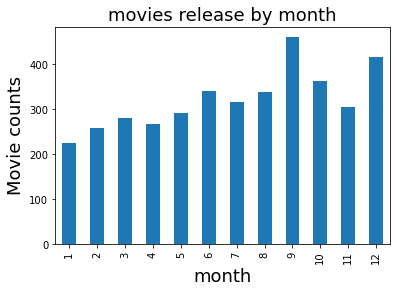

In [36]:
#get the count of each mounth and group by the month and plot the output
df_movies.groupby('release_month')['release_month'].count().plot(kind='bar')
plt.title('movies release by month',fontsize=18)
plt.xlabel('month', fontsize=18)
plt.ylabel('Movie counts', fontsize=18);

From the graph movies were mostly released in the month of September followed by the december

## Research Question 6
### In which month do producers makes more profit?

In [37]:
#Creating the profit column
#df_movies['profit'] = df_movies['revenue_adj'] - df_movies['budget_adj']

In [38]:
#df_movies.profit

### Defining a function that returns the difference between two columns of the dataset

In [39]:
#defining a function that returns the difference between two columns of the dataset
def column_difff(df,column1,column2):
    """This function finds the difference between two columns; 'column1' and 'column2' in a dataframe 'df' """
    return df[column1] - df[column2]

In [40]:
#extracting the profit_adj column from the revenue_adj and budget_adj columns
df_movies['profit_adj']= column_difff(df_movies, 'revenue_adj', 'budget_adj')

In [41]:
#extracting the profit column from the revenue and budget columns
df_movies['profit']= column_difff(df_movies, 'revenue', 'budget')

In [42]:
#Checking if the profit and profit_adj columns were created by view fisrt 5 rows of the data
df_movies.head(5)

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit_adj,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.254446e+09,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,2.101614e+08,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,1.704191e+08,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,1.718723e+09,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1.210949e+09,1.316249e+09


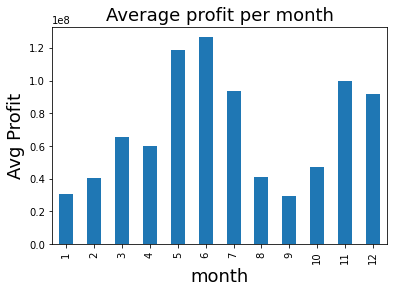

In [43]:
#get mean profit made in each month and plot
df_movies.groupby('release_month')['profit'].mean().plot(kind='bar')
plt.title('Average profit per month',fontsize=18)
plt.xlabel('month', fontsize=18)
plt.ylabel('Avg Profit', fontsize=18);

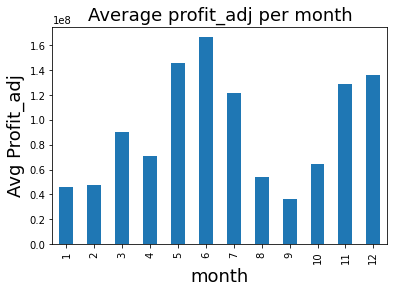

In [44]:
#get mean profit_adj made in each month and plot
df_movies.groupby('release_month')['profit_adj'].mean().plot(kind='bar')
plt.title('Average profit_adj per month',fontsize=18)
plt.xlabel('month', fontsize=18)
plt.ylabel('Avg Profit_adj', fontsize=18);

The graphs aove showed that more profit (from both the adjusted values and the true value) were made in the months of May and June when compared to others followed by the months of November and December. Highest amount of profit were made on movies released in June.

<a id='conclusions'></a>
## Conclusions



##### From the analysis of the data, the following finding were made:
>* The popularity of a movie has a positive correlation with its revenue i.e more popular movies tend to generate higher revenue than the less popular ones


>* The movie release year does not neccessary have effect on the popularity, runtime, budget and revenue of a movie.

>*  The number of movies released per year has generally been following an increasing trend. Which implies that more movies were released every year than the previous years. Also, the highest number of movies were released in year 2011 with the value count of about 200 movies.

>* The highest rated movie was produced in year 2010 with the title 'you again' and vote counts of 9767	 

>* The properties associated with high revenue movies includes;

>>* mean runtime : 115.58

>>* mean revenue :  293439628.45

>>* mean revenue_adj :  356763390.0

>>* mean popularity :  2.19

>>* mean vote_count :  1242.36

>>* mean budget :  74265236.78

>>* mean budget_adj :  83308637.29


##### Limitations
The data contained a lot of missing values and the
budget and revenue columns contained lots of zeros values which had to be deleted leading to loss of about 70 percent of the data.
The data also seems to contained some outliers which was not addressed in this analysis.
The data description does not contain unit for the columns like budget, runtime and revenues.